In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

### Read Data

In [2]:
df = pd.read_csv('datasets/dataset.csv')
df.head()

,Unnamed: 0,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,...,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
0,0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
3,3,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.head()

,Unnamed: 0,date,air_temperature,water_temperature,wind_gust_max_10min,wind_speed_avg_10min,wind_force_avg_10min,wind_direction,windchill,barometric_pressure_qfe,...,Hour_14.0,Hour_15.0,Hour_16.0,Hour_17.0,Hour_18.0,Hour_19.0,Hour_20.0,Hour_21.0,Hour_22.0,Hour_23.0
0,0,2011-01-01 00:30:00,2.233333,5.20,2.4,1.216667,1.216667,1785,2.20,974.55,...,0,0,0,0,0,0,0,0,0,0
1,1,2011-01-01 01:30:00,2.380000,5.20,2.8,0.860000,0.860000,1076,2.16,973.98,...,0,0,0,0,0,0,0,0,0,0
2,2,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
3,3,2011-01-01 02:30:00,2.580000,5.14,1.2,0.340000,0.340000,1159,2.58,973.64,...,0,0,0,0,0,0,0,0,0,0
4,4,2011-01-01 03:30:00,2.500000,5.16,1.9,0.520000,0.520000,1122,2.54,973.42,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.columns

Index(['Unnamed: 0', 'date', 'air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
       'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9', 'AccidentSeverityCategory_as2',
       'AccidentSeverityCategory_as3', 'AccidentSeverityCategory_as4',
       'WeekDay_Monday', 'WeekDay_Saturday', 'WeekDay_Sunday',
       'WeekDay_Thursday', 'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Month_2.0',
       'Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0',
       'Month_8.0', 'Month_9.0', 'Month_1

**Class Distribution**

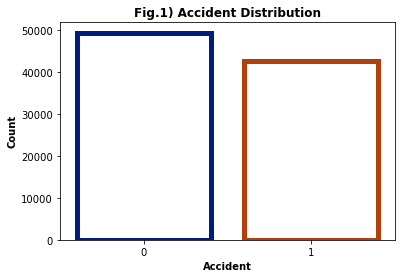

In [18]:
plt.title('Fig.1) Accident Distribution', fontweight = 'bold')
sns.countplot(x = 'Accident', data=df, facecolor=(0, 0, 0, 0),
                   linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.ylabel('Count', fontweight = 'bold')
plt.xlabel('Accident', fontweight = 'bold')
plt.show()

## I) Binary Classification

**Create new dataset containing the relevant variables:**

In [20]:
df = df[df.columns[~df.columns.isin([col for col in df.columns if col.startswith('Accident') and col != 'Accident'])]]

### a) Neural Network

**Create Input and Output Data:**

In [63]:
X = df[df.columns[~df.columns.isin(['date', 'Accident', 'Unnamed: 0'])]]
y = df['Accident']

**Create train and test datasets:**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Parameters:**

In [23]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

**Define Custom Dataloaders:**

In [24]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [25]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

**Define Neural Net Architecture**
<img src="https://miro.medium.com/max/1400/0*CLjAAd7s6o0yfEYZ.jpg"
     alt="NN"
     style="float: left; margin-right: 10px;" />

In [26]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 53.
        self.layer_1 = nn.Linear(53, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [27]:
model = binaryClassification()
device = torch.device('cpu')
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=53, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


**Accuracy function:**

In [28]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

**Train the model:**

In [29]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.58411 | Acc: 69.639
Epoch 002: | Loss: 0.56814 | Acc: 70.937
Epoch 003: | Loss: 0.56378 | Acc: 71.112
Epoch 004: | Loss: 0.56267 | Acc: 71.288
Epoch 005: | Loss: 0.56034 | Acc: 71.490
Epoch 006: | Loss: 0.55912 | Acc: 71.437
Epoch 007: | Loss: 0.55742 | Acc: 71.758
Epoch 008: | Loss: 0.55565 | Acc: 71.648
Epoch 009: | Loss: 0.55540 | Acc: 71.565
Epoch 010: | Loss: 0.55298 | Acc: 71.713
Epoch 011: | Loss: 0.55259 | Acc: 71.923
Epoch 012: | Loss: 0.55072 | Acc: 71.908
Epoch 013: | Loss: 0.54857 | Acc: 71.998
Epoch 014: | Loss: 0.54720 | Acc: 72.244
Epoch 015: | Loss: 0.54645 | Acc: 72.289
Epoch 016: | Loss: 0.54560 | Acc: 72.182
Epoch 017: | Loss: 0.54463 | Acc: 72.426
Epoch 018: | Loss: 0.54396 | Acc: 72.293
Epoch 019: | Loss: 0.54231 | Acc: 72.641
Epoch 020: | Loss: 0.54138 | Acc: 72.548
Epoch 021: | Loss: 0.53973 | Acc: 72.677
Epoch 022: | Loss: 0.53918 | Acc: 72.656
Epoch 023: | Loss: 0.53912 | Acc: 72.731
Epoch 024: | Loss: 0.53753 | Acc: 72.937
Epoch 025: | Los

**Test the model:**

In [30]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

**Classification Report**

In [31]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     16332
           1       0.68      0.68      0.68     14055

    accuracy                           0.70     30387
   macro avg       0.70      0.70      0.70     30387
weighted avg       0.70      0.70      0.70     30387



### b) Random Forest

In [32]:
#output label
target = np.array(df['Accident'])

#input features
features = df[df.columns[~df.columns.isin(['date','Accident', 'Unnamed: 0'])]]
feature_list = list(features.columns)
features = np.array(features)

#split dataset into training and testing
train_features, test_features, train_target, test_target = train_test_split(features, 
target, test_size = 0.25, random_state = 10)


# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators= 100)

# Train the model on training data
clf.fit(train_features, train_target)

predictions = clf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_target, predictions))

#check contributions to prediction
feature_names = df.columns[~df.columns.isin(['date','Accident', 'Unnamed: 0'])]
feature_imp = pd.Series(clf.feature_importances_, index=feature_names.sort_values(ascending=False))
feature_imp

Accuracy: 0.7452760523000739


windchill                  0.064193
wind_speed_avg_10min       0.059366
wind_gust_max_10min        0.054802
wind_force_avg_10min       0.055021
wind_direction             0.053887
water_temperature          0.063671
water_level                0.062583
precipitation              0.063436
humidity                   0.011333
global_radiation           0.059130
dew_point                  0.121014
barometric_pressure_qfe    0.069132
air_temperature            0.049987
WeekDay_Wednesday          0.006500
WeekDay_Tuesday            0.008793
WeekDay_Thursday           0.017599
WeekDay_Sunday             0.006686
WeekDay_Saturday           0.006359
WeekDay_Monday             0.006627
Month_9.0                  0.002805
Month_8.0                  0.003303
Month_7.0                  0.003740
Month_6.0                  0.003985
Month_5.0                  0.003703
Month_4.0                  0.003415
Month_3.0                  0.003345
Month_2.0                  0.003866
Month_12.0                 0

## II) Mulit-Class Classification

**Notes:**
<br>
***a)***
<br>
Multi-class prediction for AccidentSeverity
<br>
***b)***
<br>
Multi-class prediction for AccidentType

In [55]:
df = pd.read_csv('datasets/dataset.csv')

In [56]:
df.columns

Index(['Unnamed: 0', 'date', 'air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
       'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9', 'AccidentSeverityCategory_as2',
       'AccidentSeverityCategory_as3', 'AccidentSeverityCategory_as4',
       'WeekDay_Monday', 'WeekDay_Saturday', 'WeekDay_Sunday',
       'WeekDay_Thursday', 'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Month_2.0',
       'Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0',
       'Month_8.0', 'Month_9.0', 'Month_1

### - Accident Severity prediction

### i) Neural Network

**Create Input and Output Data:**

In [57]:
df.columns

Index(['Unnamed: 0', 'date', 'air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
       'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9', 'AccidentSeverityCategory_as2',
       'AccidentSeverityCategory_as3', 'AccidentSeverityCategory_as4',
       'WeekDay_Monday', 'WeekDay_Saturday', 'WeekDay_Sunday',
       'WeekDay_Thursday', 'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Month_2.0',
       'Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0',
       'Month_8.0', 'Month_9.0', 'Month_1

In [58]:
cols = ['Unnamed: 0', 'date', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
        'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9']

#create data frame for Random Forest prediction
df_nn_acc_type = df[df.columns[~df.columns.isin(cols)]]

In [67]:
X = df_nn_acc_type[df_nn_acc_type.columns[~df_nn_acc_type.columns.isin(cols)]]
y = np.array(df_nn_acc_type[['AccidentSeverityCategory_as2', 'AccidentSeverityCategory_as3', 'AccidentSeverityCategory_as4']])

In [68]:
type(y)

numpy.ndarray

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [69]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

ValueError: could not determine the shape of object type 'DataFrame'

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class multiClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 53.
        self.layer_1 = nn.Linear(53, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
model = binaryClassification()
device = torch.device('cpu')
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

### ii) Random Forest

In [46]:
#list of columns that are not necessary for prediction
cols = ['Unnamed: 0', 'date', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
        'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9']


#create data frame for Random Forest prediction
df_rf_acc_type = df[df.columns[~df.columns.isin(cols)]]
df_rf_acc_type.columns

Index(['air_temperature', 'water_temperature', 'wind_gust_max_10min',
       'wind_speed_avg_10min', 'wind_force_avg_10min', 'wind_direction',
       'windchill', 'barometric_pressure_qfe', 'precipitation', 'dew_point',
       'global_radiation', 'humidity', 'water_level',
       'AccidentSeverityCategory_as2', 'AccidentSeverityCategory_as3',
       'AccidentSeverityCategory_as4', 'WeekDay_Monday', 'WeekDay_Saturday',
       'WeekDay_Sunday', 'WeekDay_Thursday', 'WeekDay_Tuesday',
       'WeekDay_Wednesday', 'Month_2.0', 'Month_3.0', 'Month_4.0', 'Month_5.0',
       'Month_6.0', 'Month_7.0', 'Month_8.0', 'Month_9.0', 'Month_10.0',
       'Month_11.0', 'Month_12.0', 'Hour_1.0', 'Hour_2.0', 'Hour_3.0',
       'Hour_4.0', 'Hour_5.0', 'Hour_6.0', 'Hour_7.0', 'Hour_8.0', 'Hour_9.0',
       'Hour_10.0', 'Hour_11.0', 'Hour_12.0', 'Hour_13.0', 'Hour_14.0',
       'Hour_15.0', 'Hour_16.0', 'Hour_17.0', 'Hour_18.0', 'Hour_19.0',
       'Hour_20.0', 'Hour_21.0', 'Hour_22.0', 'Hour_23.0'],
      d

**Define targets and labels and run the model:**

In [47]:
#output label
output_class = df_rf_acc_type[[col for col in df_rf_acc_type.columns if col.startswith('Accident')]]
target = np.array(output_class)

#input features
features = df_rf_acc_type[df_rf_acc_type.columns[~df_rf_acc_type.columns.isin(output_class)]]
feature_list = list(features.columns)
features = np.array(features)

#split dataset into training and testing
train_features, test_features, train_target, test_target = train_test_split(features, 
target, test_size = 0.25, random_state = 10)


# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators= 250)

# Train the model on training data
clf.fit(train_features, train_target)

predictions = clf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_target, predictions))

Accuracy: 0.6541853090656358


### - Accident Type prediction

### i) Neural Network

In [ ]:
df.columns


In [ ]:
cols = ['Unnamed: 0', 'date', 'AccidentInvolvingPedestrian',
       'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle', 'Accident',
        'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9']

In [ ]:
#create data frame for Random Forest prediction
df_nn_acc_type = df[df.columns[~df.columns.isin(cols)]]

X = df_nn_acc_type[df_nn_acc_type.columns[~df_nn_acc_type.columns.isin(cols)]]
y = df_nn_acc_type[['AccidentSeverityCategory_as2', 'AccidentSeverityCategory_as3', 'AccidentSeverityCategory_as4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))


In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)


In [ ]:
class multiClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 53.
        self.layer_1 = nn.Linear(53, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [ ]:
model = binaryClassification()
device = torch.device('cpu')
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc


In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

### ii) Random Forest

In [ ]:
#List of columns that are necessary for prediction
cols = ['air_temperature', 'water_temperature',
       'wind_gust_max_10min', 'wind_speed_avg_10min', 'wind_force_avg_10min',
       'wind_direction', 'windchill', 'barometric_pressure_qfe',
       'precipitation', 'dew_point', 'global_radiation', 'humidity',
       'water_level', 'AccidentType_at00', 'AccidentType_at1', 'AccidentType_at2',
       'AccidentType_at3', 'AccidentType_at4', 'AccidentType_at5',
       'AccidentType_at6', 'AccidentType_at7', 'AccidentType_at8',
       'AccidentType_at9',
       'WeekDay_Monday', 'WeekDay_Saturday', 'WeekDay_Sunday',
       'WeekDay_Thursday', 'WeekDay_Tuesday', 'WeekDay_Wednesday', 'Month_2.0',
       'Month_3.0', 'Month_4.0', 'Month_5.0', 'Month_6.0', 'Month_7.0',
       'Month_8.0', 'Month_9.0', 'Month_10.0', 'Month_11.0', 'Month_12.0',
       'Hour_1.0', 'Hour_2.0', 'Hour_3.0', 'Hour_4.0', 'Hour_5.0', 'Hour_6.0',
       'Hour_7.0', 'Hour_8.0', 'Hour_9.0', 'Hour_10.0', 'Hour_11.0',
       'Hour_12.0', 'Hour_13.0', 'Hour_14.0', 'Hour_15.0', 'Hour_16.0',
       'Hour_17.0', 'Hour_18.0', 'Hour_19.0', 'Hour_20.0', 'Hour_21.0',
       'Hour_22.0', 'Hour_23.0']

#Create data frame for Random Forest prediction
df_rf_acc_sev = df[df.columns[df.columns.isin(cols)]]

**Define targets and labels and run the model:**

In [ ]:
#output label
output_class = df_rf_acc_sev[[col for col in df_rf_acc_sev.columns if col.startswith('Accident')]]
target = np.array(output_class)

#input features
features = df_rf_acc_sev[df_rf_acc_sev.columns[~df_rf_acc_sev.columns.isin(output_class)]]
feature_list = list(features.columns)
features = np.array(features)

#split dataset into training and testing
train_features, test_features, train_target, test_target = train_test_split(features, 
target, test_size = 0.25, random_state = 11)


# Instantiate model with 100 decision trees
clf = RandomForestClassifier(n_estimators= 130)

# Train the model on training data
clf.fit(train_features, train_target)

predictions = clf.predict(test_features)
print("Accuracy:", metrics.accuracy_score(test_target, predictions))